# **TRABALHO FINAL IA - 2022** #

Utilização do Dataset "WineQuality" para prever a qualidade do vinho vermelho.

<blockquote> Objetivos:

- Anállise estatística e descrição dos dados;
- Anállise gráfica dos dados utilizando: Barras, Boxplots, Histograma, Distribuição, Mapa de Calor;
- Pré-processamento dos dados;
- Utilização de algoritmos de Machine Learning do tipo: KNN, Regressão Linear (SVM), Naive Bayes, Floresta Aleatória;
- Análise de desempenho dos algoritmos de Machine Learning através da medição de acurácia e tempo de execução. </blockquote>


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (2).csv


In [ ]:
# Importando Bibliotecas Padrão Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Mostrar todas colunas do Dataset
pd.set_option('display.max_columns', None)
 
# Carregando o Dataset para um Dataframe pandas
df = pd.read_csv("winequality-red.csv", sep=';')

## **Análise Estatística e Descrição dos Dados**

<blockquote>

- Quantidade de dados (Linhas e Colunas);
- Nome das colunas;
- Tipos de qualidade do vinho (Classe);
- Medidas Estatísticas: Média, Mediana, Desvio Padrão, etc.

</blockquote>

In [ ]:
print("Tamanho do conjunto de dados: ", df.shape)

Tamanho do conjunto de dados:  (1599, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Tipos de qualidade de vinho (Classe)
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## **Análise Gráfica dos Dados**

<blockquote>

- Gráfico de Barras da classe "quality";
- BoxPlot dos atributos em relação a classe "quality";
- Histograma dos dados;
- Gráfico de Distribuição e BoxPlot dos dados.
- Heatmap (correlação entre dados).

</blockquote>

### **GRÁFICO DE BARRAS** ###

In [ ]:
def graficoBarras(df):   
    figure, ax = plt.subplots()
    figure.set_size_inches(11.7, 8.27)
    
    sns.countplot(df['quality'])

    plt.title("GRÁFICO DE BARRAS DA CLASSE: quality", fontsize = 16, fontweight = "bold")
    plt.ylabel("Count", fontsize = 16)
    plt.xlabel("quality", fontsize = 16)
    plt.tick_params(axis = "x", labelsize = 14)
    plt.tick_params(axis = "y", labelsize = 14)
    plt.show()

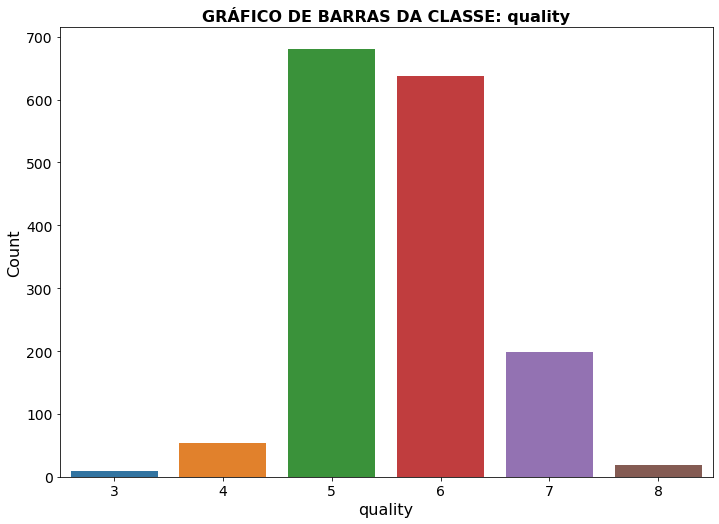

In [ ]:
graficoBarras(df)

### **BOXPLOT** ###

In [ ]:
def boxPlot(df):

    X = df
    figure, axis = plt.subplots(3, 4, figsize=(20, 20))

    eixo_i = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2]
    eixo_j = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2]

    labels = X.columns
    
    k = 0
    for label in labels:
      if k == len(X.columns) - 1:
        break

      sns.boxplot(ax = axis[eixo_i[k]][eixo_j[k]], x = df["quality"], y = X[label])
      axis[eixo_i[k]][eixo_j[k]].set_title("BOXPLOT: " + label, fontsize = 12, fontweight = "bold")
      axis[eixo_i[k]][eixo_j[k]].set(xlabel = None, ylabel = None)

      k += 1

    figure.delaxes(axis[2][3])
    plt.show()

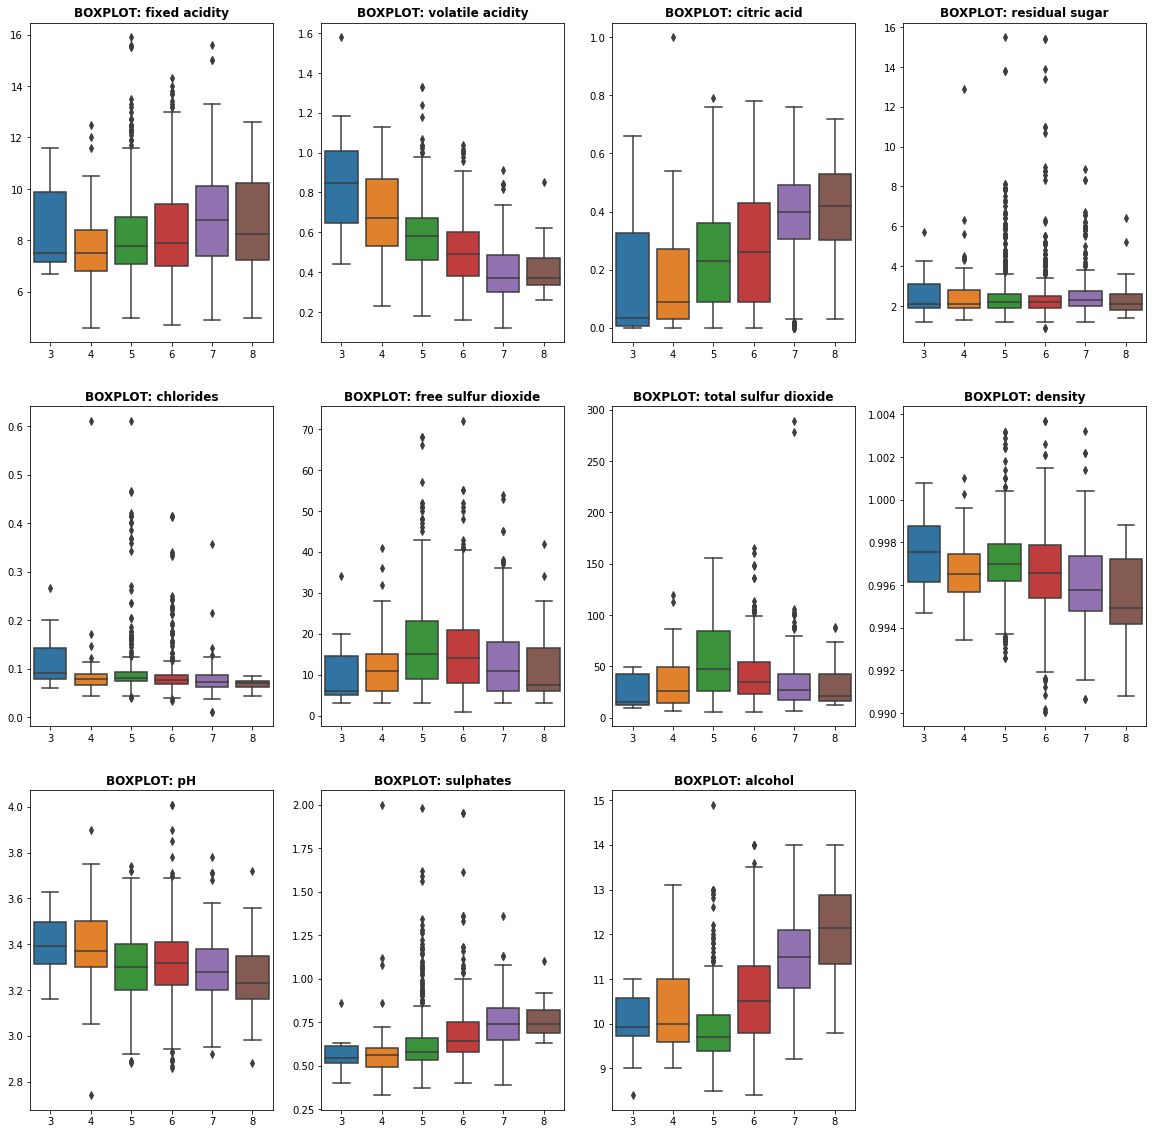

In [ ]:
boxPlot(df)

### **HISTOGRAMA** ###

In [ ]:
def histograma(df):

    X = df
    figure, axis = plt.subplots(3, 4, figsize=(20, 24))

    eixo_i = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
    eixo_j = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
    
    k = 0
    for label in X.columns:
      if k == len(X.columns) - 1:
        break

      sns.histplot(ax = axis[eixo_i[k]][eixo_j[k]], data = X, x = label)
      axis[eixo_i[k]][eixo_j[k]].set_title("HISTOGRAMA: " + label, fontsize = 12, fontweight = "bold")
      axis[eixo_i[k]][eixo_j[k]].set(xlabel = None, ylabel = None)

      k += 1

    sns.histplot(ax = axis[2][3], data = X, x = "quality",discrete=True)
    axis[2][3].set_title("HISTOGRAMA: " + label, fontsize = 12, fontweight = "bold")
    axis[2][3].set_xticks(np.unique(X["quality"]))
    axis[2][3].set(xlabel = None, ylabel = None)

    plt.show()

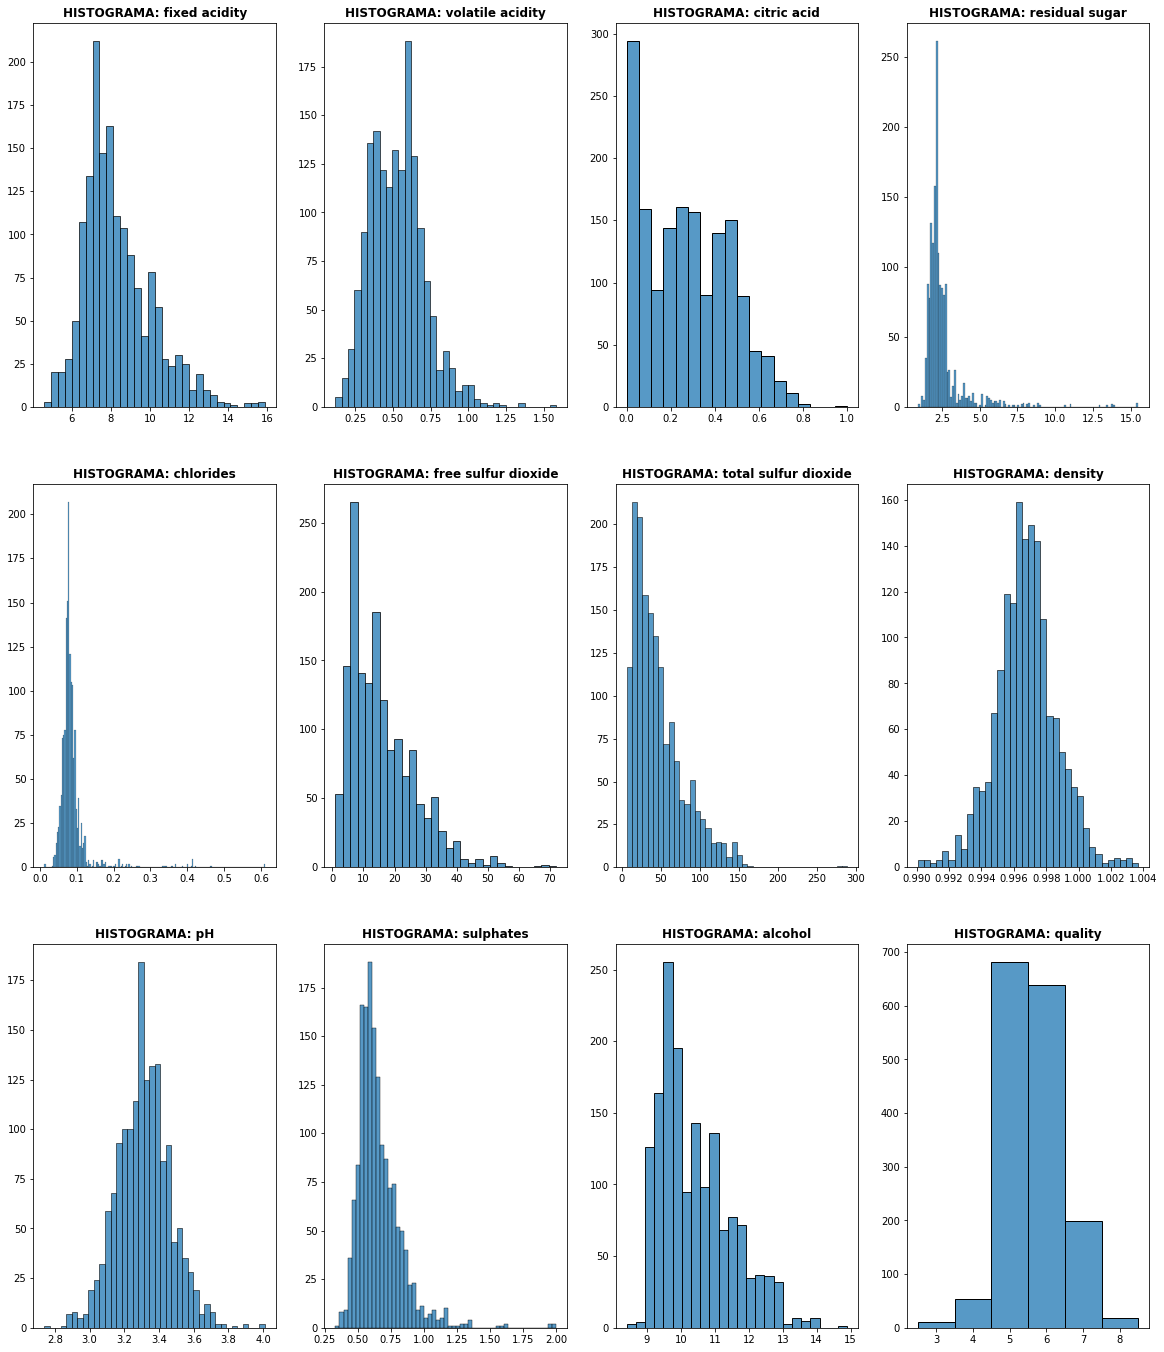

In [ ]:
histograma(df)

### **GRÁFICO DE DISTRIBUIÇÃO E BOXPLOT** ###

In [ ]:
def distBox(label):

    X = df
    figure, axis = plt.subplots(6, 4, figsize=(20, 30))

    eixo_i = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]
    eixo_j = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
    
    k = 0
    for label in X.columns:
      
      sns.distplot(X[label], ax = axis[eixo_i[k]][eixo_j[k]])
      axis[eixo_i[k]][eixo_j[k]].set_title("DISTRIBUIÇÃO: " + label, fontsize = 12, fontweight = "bold")
      axis[eixo_i[k]][eixo_j[k]].set(xlabel = None, ylabel = None)

      k += 1

      sns.boxplot(X[label], ax = axis[eixo_i[k]][eixo_j[k]])
      axis[eixo_i[k]][eixo_j[k]].set_title("BOXPLOT: " + label, fontsize = 12, fontweight = "bold")
      axis[eixo_i[k]][eixo_j[k]].set(xlabel = None, ylabel = None)

      k += 1

    plt.show()

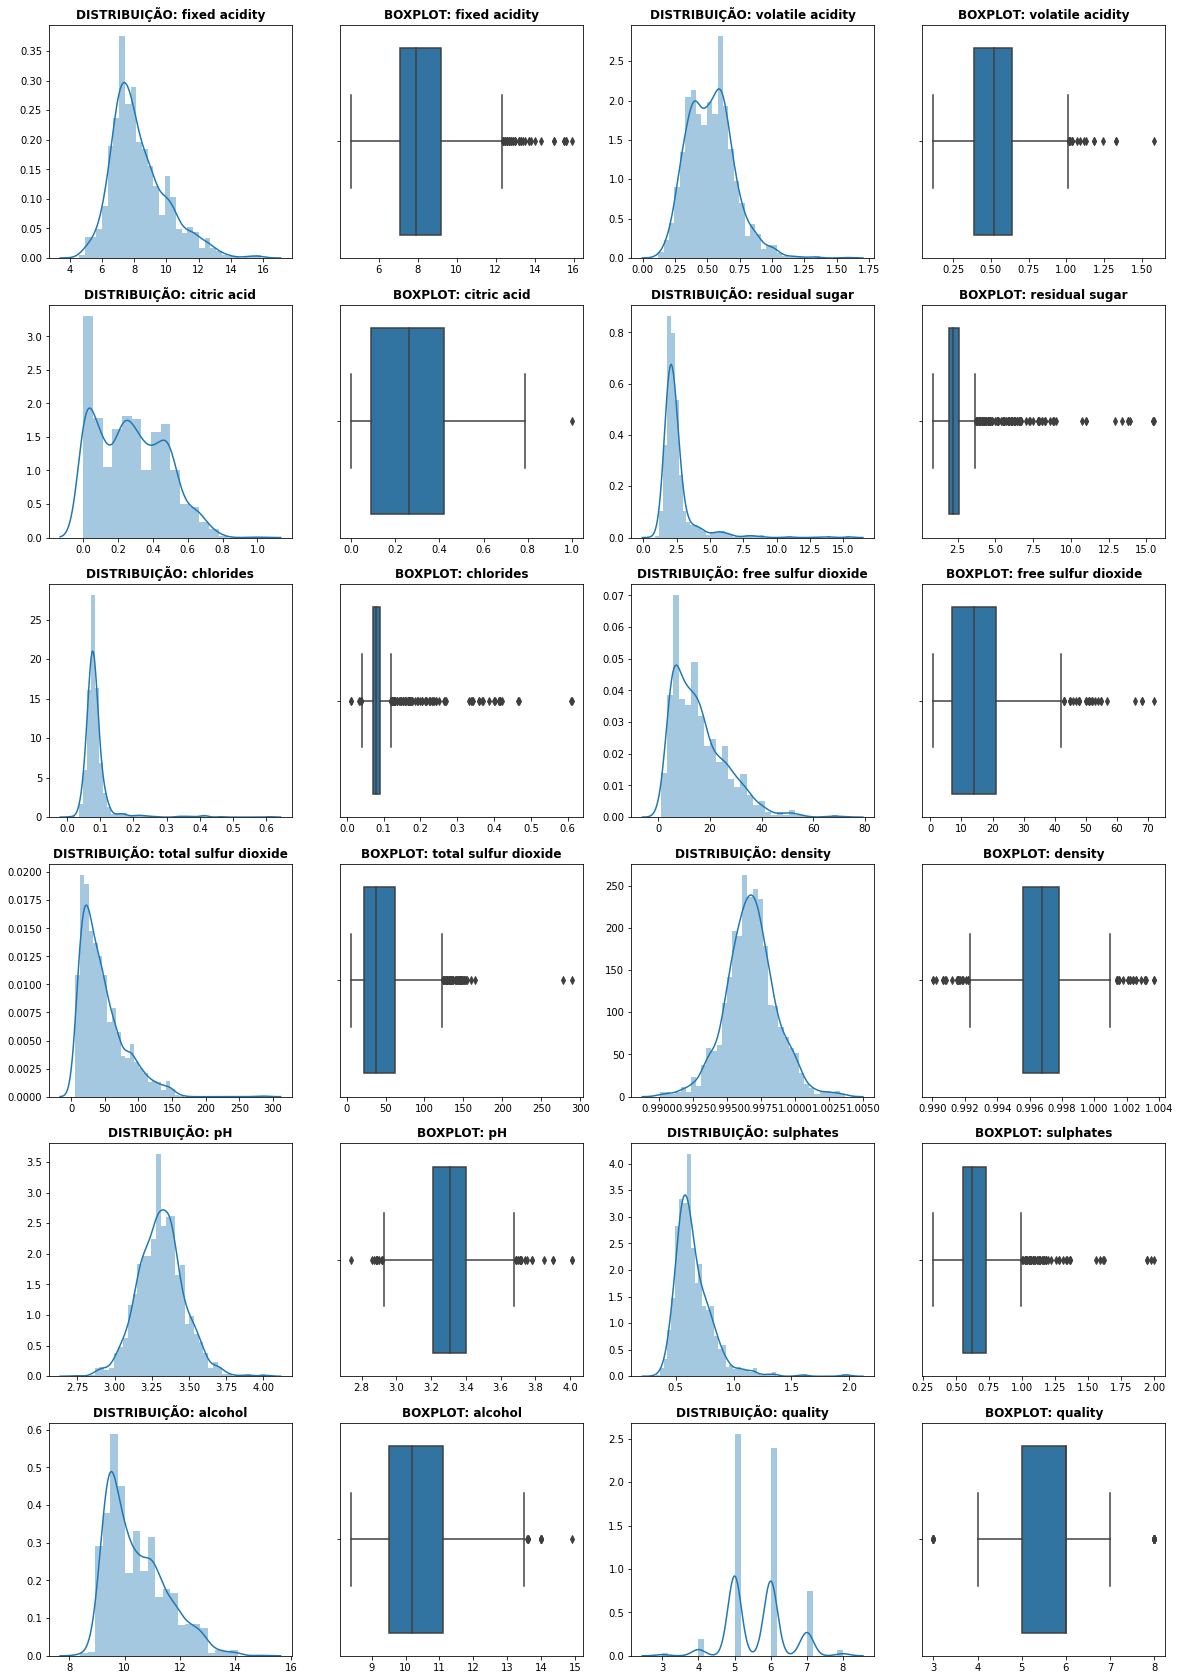

In [ ]:
distBox(df)

### **MAPA DE CALOR** ###

In [ ]:
def heatmap(df):

  X = df

  corr_matrix = X.corr()
  labels = X.columns

  diag_matrix = np.triu(corr_matrix)
  np.fill_diagonal(diag_matrix, False)

  figure, ax = plt.subplots()
  figure.set_size_inches(14, 10)
  cmap = sns.diverging_palette(h_neg=240, h_pos=10, s=100, as_cmap=True,)
  sns.heatmap(corr_matrix, cmap=cmap, center=0, vmin=-1, vmax=1, square=True, linewidths=0.01, annot=True, mask=diag_matrix, xticklabels=labels, yticklabels=labels)

  plt.title("MAPA DE CALOR - CORRELAÇÃO ENTRE DADOS", fontsize = 15, fontweight = "bold")
  plt.tick_params(axis = "x", labelsize = 11.5)
  plt.tick_params(axis = "y", labelsize = 11.5)

  plt.show()

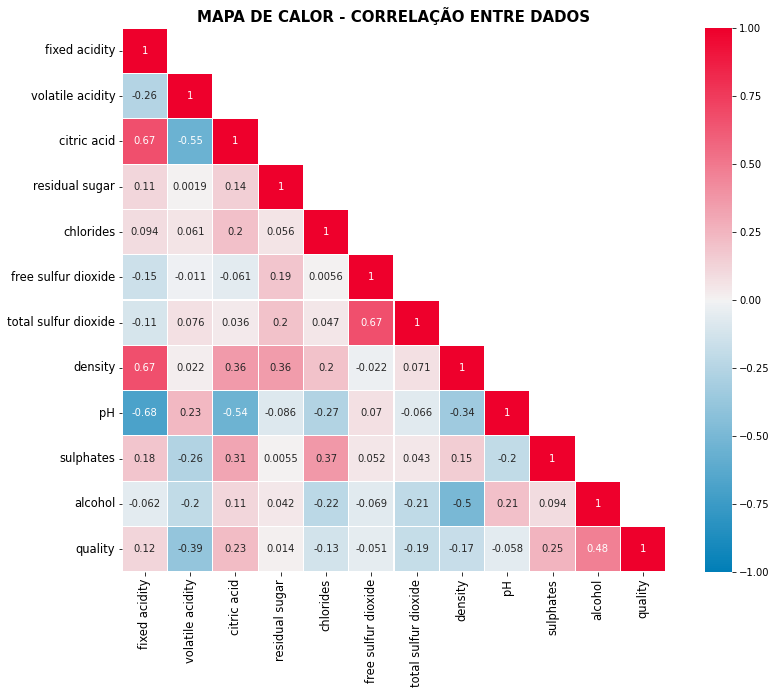

In [ ]:
heatmap(df)

###**Pré-Processamento dos Dados**

<blockquote>

- Definindo atributos e classe;
- Separação do conjunto de dados para treinamento e testagem (predição);
- Normalização dos Dados.

</blockquote>


In [ ]:
# Definindo atributos e classe

X = df.drop("quality", axis = "columns")
y = df["quality"]

print("Tamanho do conjunto de dados X: ", X.shape)
print("Tamanho do conjunto de dados y: ", y.shape)

Tamanho do conjunto de dados X:  (1599, 11)
Tamanho do conjunto de dados y:  (1599,)


In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [ ]:
# Importando Biblioteca para o treinamento do conjunto de dados
from sklearn.model_selection import train_test_split

# Separando 70% dos dados para treinamento e 30% para testagem (predição)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 21, shuffle = True)

print("Tamanho do conjunto de dados X_train: ", X_train.shape)
print("Tamanho do conjunto de dados X_test: ", X_test.shape)
print("Tamanho do conjunto de dados y_train: ", y_train.shape)
print("Tamanho do conjunto de dados y_test: ", y_test.shape)

Tamanho do conjunto de dados X_train:  (1119, 11)
Tamanho do conjunto de dados X_test:  (480, 11)
Tamanho do conjunto de dados y_train:  (1119,)
Tamanho do conjunto de dados y_test:  (480,)


In [ ]:
# Para utilizar os modelos de Machine Learning é necessário normalizar os dados
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## **Utilização de Algoritmos de Machine Learning**

<blockquote>

- KNN;
- Regressão Linear (SVM);
- Naive Bayes;
- Floresta Aleatória.

</blockquote>

###**KNN**

In [ ]:
# Importando Biliotecas para o Modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def KNN(K):
    
    knn = KNeighborsClassifier(n_neighbors = K, weights = 'distance')
    knn.fit(X_train_sc, y_train.ravel())
    knn_pred_train = knn.predict(X_train_sc)
    knn_pred_test = knn.predict(X_test_sc)

    return knn_pred_train, knn_pred_test

In [ ]:
# Encontrando o melhor parâmetro K por meio da validação cruzada
def crossValidation():

  modelo = KNeighborsClassifier()
  k_vizinhos = {'n_neighbors':list(range(1, 50, 2)), 'weights':['uniform', 'distance']}
  CV = GridSearchCV(modelo, k_vizinhos, cv = 5)
  CV_results = CV.fit(X_train_sc, y_train.ravel())
  
  return CV_results

### **Regressão Linear (SVM)**

In [ ]:
# Importando Biblioteca para o Modelo Regressão Linear (SVM)
from sklearn.svm import SVC

In [ ]:
def regressaoLinear():

  svc_clf = SVC(kernel = 'linear')
  svc_clf.fit(X_train_sc, y_train.ravel())
  svc_clf_pred_train = svc_clf.predict(X_train_sc)
  svc_clf_pred_test = svc_clf.predict(X_test_sc)

  return svc_clf_pred_train, svc_clf_pred_test

### **Naive Bayes**

In [ ]:
# Importando Biblioteca para o Modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
def naiveBayes():
  
  gauss_nb = GaussianNB()
  gauss_nb.fit(X_train_sc, y_train.ravel())
  gauss_nb_pred_train = gauss_nb.predict(X_train_sc)
  gauss_nb_pred_test = gauss_nb.predict(X_test_sc)

  return gauss_nb_pred_train, gauss_nb_pred_test

###**Floresta Aleatória**

In [ ]:
# Importando Biblioteca para o Modelo Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def florestaAleatoria():

  fa = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800)
  fa.fit(X_train_sc, y_train.ravel())
  fa_pred_train = fa.predict(X_train_sc)
  fa_pred_test = fa.predict(X_test_sc)

  return fa_pred_train, fa_pred_test

## **Análise de Desempenho dos Algoritmos**

- Acurácia dos algoritmos;
- Tempo de Execução.


### **Acurácia dos Algoritmos**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn_pred_train, knn_pred_test = KNN(11)
print("Acurácia treinamento do modelo KNN para K = 11:", accuracy_score(y_train, knn_pred_train))
print("Acurácia testagem do modelo KNN para K = 11:", accuracy_score(y_test, knn_pred_test))

Acurácia treinamento do modelo KNN para K = 11: 1.0
Acurácia testagem do modelo KNN para K = 11: 0.64375


In [ ]:
CV_results = crossValidation()
print('Melhor Acurácia do modelo KNN: ', CV_results.best_score_)
print('Melhor Parâmetro K: ', CV_results.best_params_)

Melhor Acurácia do modelo KNN:  0.6692945227418321
Melhor Parâmetro K:  {'n_neighbors': 45, 'weights': 'distance'}


In [ ]:
svc_clf_pred_train, svc_clf_pred_test = regressaoLinear()
print("Acurácia treinamento do modelo Regressão Linear (SVM): ", accuracy_score(y_train, svc_clf_pred_train))
print("Acurácia testagem do modelo Regressão Linear (SVM): ", accuracy_score(y_test, svc_clf_pred_test))

Acurácia treinamento do modelo Regressão Linear (SVM):  0.5924932975871313
Acurácia testagem do modelo Regressão Linear (SVM):  0.5729166666666666


In [ ]:
gauss_nb_pred_train, gauss_nb_pred_test = naiveBayes()
print("Acurácia treinamento do modelo Naive Bayes: ", accuracy_score(y_train, gauss_nb_pred_train))
print("Acurácia testagem do modelo Naive Bayes: ", accuracy_score(y_test, gauss_nb_pred_test))

Acurácia treinamento do modelo Naive Bayes:  0.5549597855227882
Acurácia testagem do modelo Naive Bayes:  0.5270833333333333


In [ ]:
fa_pred_train, fa_pred_test = florestaAleatoria()
print("Acurácia treinamento do modelo Floresta Aleatória: ", accuracy_score(y_train, fa_pred_train))
print("Acurácia testagem do modelo Floresta Aleatória: ", accuracy_score(y_test, fa_pred_test))

Acurácia treinamento do modelo Floresta Aleatória:  1.0
Acurácia testagem do modelo Floresta Aleatória:  0.6770833333333334


In [ ]:
def graficoAcuracia():

  # Executando os algoritmos de Machine Learning
  knn_pred_train, knn_pred_test = KNN(45)
  svc_clf_pred_train, svc_clf_pred_test = regressaoLinear()
  gauss_nb_pred_train, gauss_nb_pred_test = naiveBayes()
  fa_pred_train, fa_pred_test = florestaAleatoria()

  # Obtendo resultados da acurácia de treinamento
  knn_score_train = accuracy_score(y_train, knn_pred_train)
  svc_clf_pred_train = accuracy_score(y_train, svc_clf_pred_train)
  gauss_nb_pred_train = accuracy_score(y_train, gauss_nb_pred_train)
  fa_pred_train = accuracy_score(y_train, fa_pred_train)

  # Obtendo resultados da acurácia de testagem
  knn_pred_test = accuracy_score(y_test, knn_pred_test)
  svc_clf_pred_test = accuracy_score(y_test, svc_clf_pred_test)
  gauss_nb_pred_test = accuracy_score(y_test, gauss_nb_pred_test)
  fa_pred_test = accuracy_score(y_test, fa_pred_test)

  modelos = ["KNN", "Regressão Linear SVM", "Naive Bayes", "Floresta Aleatoria"]
  modelos_train = [knn_score_train, svc_clf_pred_train, gauss_nb_pred_train, fa_pred_train]
  modelos_test = [knn_pred_test, svc_clf_pred_test, gauss_nb_pred_test, fa_pred_test]

  figure, axis = plt.subplots(1, 2, figsize=(18, 7))

  axis[0].bar(modelos, modelos_train, color = "blue")
  axis[0].set_title("Acurácia Treinamento", fontsize = 16, fontweight = "bold")
  axis[0].set_ylabel('Acurácia (%)', fontsize = 14)
  axis[0].set_xlabel('Algoritmo', fontsize = 14)
  axis[0].tick_params(axis = "x", labelsize = 12)
  axis[0].tick_params(axis = "y", labelsize = 14)

  axis[1].bar(modelos, modelos_test, color="blue")
  axis[1].set_title("Acurácia Testagem", fontsize = 16, fontweight = "bold")
  axis[1].set_ylabel('Acurácia (%)', fontsize = 14)
  axis[1].set_xlabel('Algoritmo', fontsize = 14)
  axis[1].tick_params(axis = "x", labelsize = 12)
  axis[1].tick_params(axis = "y", labelsize = 14)

  plt.show()

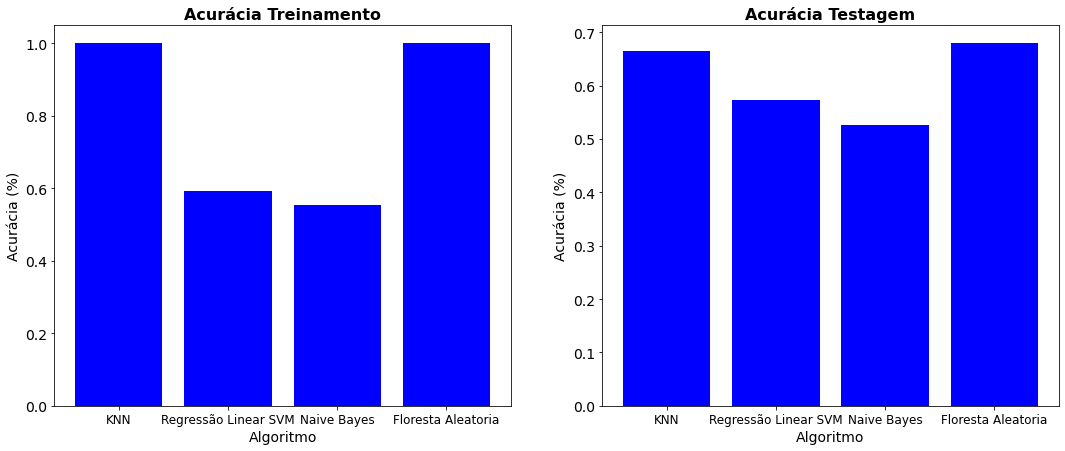

In [ ]:
graficoAcuracia()

### **Tempo de Execução**

In [ ]:
# Importando Biblioteca para avaliar o Tempo de Execução
import time as tm

In [ ]:
def tempoExecucao():

  knn = KNeighborsClassifier(n_neighbors = 45, weights = 'distance')
  svc_clf = SVC(kernel = 'linear')
  gauss_nb = GaussianNB()
  fa = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800)

  tempo_exec = []
  modelos = [knn, svc_clf, gauss_nb, fa]

  for modelo in modelos:
    init = tm.time()
    modelo.fit(X_train_sc, y_train.ravel())
    end = tm.time()
    tempo_exec.append(end - init)

  return tempo_exec

In [ ]:
def graficoTempoExecucao():

  modelos = ["KNN", "Regressão Linear SVM", "Naive Bayes", "Floresta Aleatoria"]
  tempo_exec = tempoExecucao()

  figure, ax = plt.subplots()
  figure.set_size_inches(10, 5)

  plt.bar(modelos, tempo_exec, color = "maroon")

  plt.title("Algoritmo x Tempo de Execução", fontsize = 16, fontweight = "bold")
  plt.xlabel('Algoritmo', fontsize = 16)
  plt.ylabel('Tempo de Execução (s)', fontsize = 16)
  plt.tick_params(axis = "x", labelsize = 14)
  plt.tick_params(axis = "y", labelsize = 14)

  plt.show()

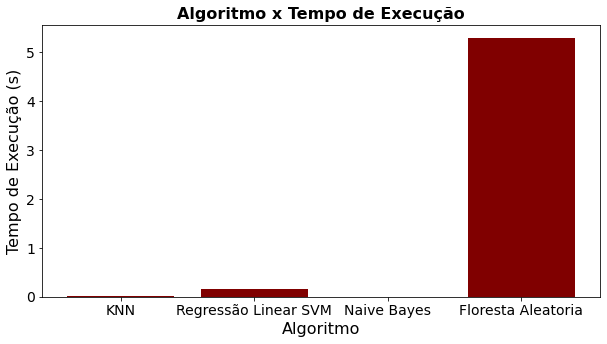

In [ ]:
graficoTempoExecucao()

# **CONSIDERAÇÕES FINAIS** #

```c
/*   
 *   UNIFESP SÃO JOSÉ DOS CAMPOS
 *
 *   TRABALHO FINAL IA - 2022
 *   DOSCENTE: Lilian Berton
 *   
 *   DATASET UTILIZADO: winequality-red.csv
 *   LINGUAGEM DE PROGRAMAÇÃO: Python
 * 
 *   DISCENTE: Luiz Gustavo Alves Assis da Silva
 *   EMAIL: luiz.gustavo16@unifesp.br
/*
```
